In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

### We will use VGG16 ... for ResNet we just need to change the name of VGG16 in to ResNet

In [3]:
## pre_trained model library

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from glob import glob

In [4]:
## The default input size for this model is (224 x 224)

IMAGE_SIZE = [224,224]

In [5]:
## file path

train_path = 'image_dataset/train'
test_path = 'image_dataset/test'

In [6]:
## for this VGG16 the input data dimension should be 3D....
            # 3=> only for RGB color image ... and  1=>for black & whie img
vgg = VGG16(input_shape= IMAGE_SIZE +[3], weights= 'imagenet', include_top =False)

In [7]:
for layer in vgg.layers:
    layer.trainable =False  

In [8]:
folders = glob('image_dataset/train/*')

In [9]:
x = Flatten()(vgg.output)

In [10]:
prediction = Dense(len(folders), activation= 'softmax')(x)

In [11]:
model = Model(inputs = vgg.input, outputs = prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
## compile the model 
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [14]:
train_datagen = ImageDataGenerator(rescale= 1./255, shear_range= 0.2, zoom_range= 0.2, horizontal_flip= True)

In [15]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('image_dataset/train', target_size= (224,224), batch_size= 32, 
                                                 class_mode= 'categorical')

Found 4 images belonging to 4 classes.


In [17]:
testing_set = test_datagen.flow_from_directory('image_dataset/test', target_size= (224,224), batch_size= 32, 
                                                 class_mode= 'categorical')

Found 4 images belonging to 4 classes.


In [18]:
## fit the model 
r = model.fit_generator( training_set, validation_data= testing_set, epochs= 5, steps_per_epoch = len(training_set),
                       validation_steps= len(testing_set))

C:\Users\HP\AppData\Local\Temp\ipykernel_16776\2319010640.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator( training_set, validation_data= testing_set, epochs= 5, steps_per_epoch = len(training_set),


Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 1.9056 - accuracy: 0.2500 - val_loss: 1.8117 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 3s 3s/step - loss: 1.2801 - accuracy: 0.7500 - val_loss: 2.1329 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 3s 3s/step - loss: 0.9963 - accuracy: 0.5000 - val_loss: 1.5616 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 3s 3s/step - loss: 0.4078 - accuracy: 0.7500 - val_loss: 1.2702 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: 0.1213 - accuracy: 1.0000 - val_loss: 1.5063 - val_accuracy: 0.5000


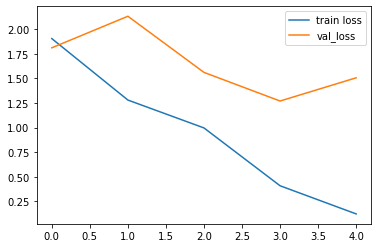

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(r.history['loss'], label ='train loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()
plt.show()
plt.savefig('loss_val_loss')

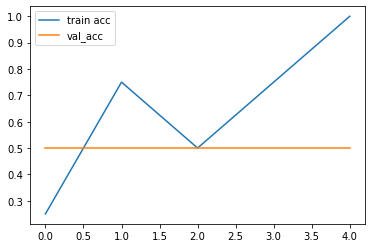

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(r.history['accuracy'], label ='train acc')
plt.plot(r.history['val_accuracy'], label ='val_acc')
plt.legend()
plt.show()
plt.savefig('Acc_val_acc')

In [21]:
from tensorflow.keras.models import load_model

In [22]:
model.save('facefeature_new_model.h5')